# Price trend analysis
### Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Load data

In [14]:
# Load data
vet = pd.read_csv("Model/Code/src/price_trends/VET-USD.csv")
vtho = pd.read_csv("Model/Code/src/price_trends/VTHO-USD.csv")

# Create a dataframe for the combined data
df = pd.DataFrame(columns=["Date", "VET", "VET_percentage", "VTHO", "Ratio"])
df["Date"] = vtho["Date"]
df["VET"] = vet["Close"]
df["VET_percentage"] = 1 + df.VET.pct_change()
df["VTHO"] = vtho["Close"]
df["VTHO_percentage"] = 1 + df.VTHO.pct_change()
df["Ratio"] = df["VTHO"] / df["VET"]



# df
df.iloc[991:-1,:]

,Date,VET,VET_percentage,VTHO,Ratio,VTHO_percentage
991,2021-04-20,0.251997,1.098797,0.021500,0.085318,1.076938
992,2021-04-21,0.227231,0.901721,0.019837,0.087299,0.922651
993,2021-04-22,0.190797,0.839661,0.016774,0.087915,0.845592
994,2021-04-23,0.201285,1.054969,0.017346,0.086176,1.034100
995,2021-04-24,0.178279,0.885704,0.015354,0.086123,0.885161
...,...,...,...,...,...,...
1351,2022-04-15,0.061597,1.004665,0.004413,0.071643,0.989240
1352,2022-04-16,0.061377,0.996428,0.004260,0.069407,0.965330
1353,2022-04-17,0.058097,0.946560,0.004115,0.070830,0.965962
1354,2022-04-18,0.059548,1.024975,0.004193,0.070414,1.018955


### Plot uptrend

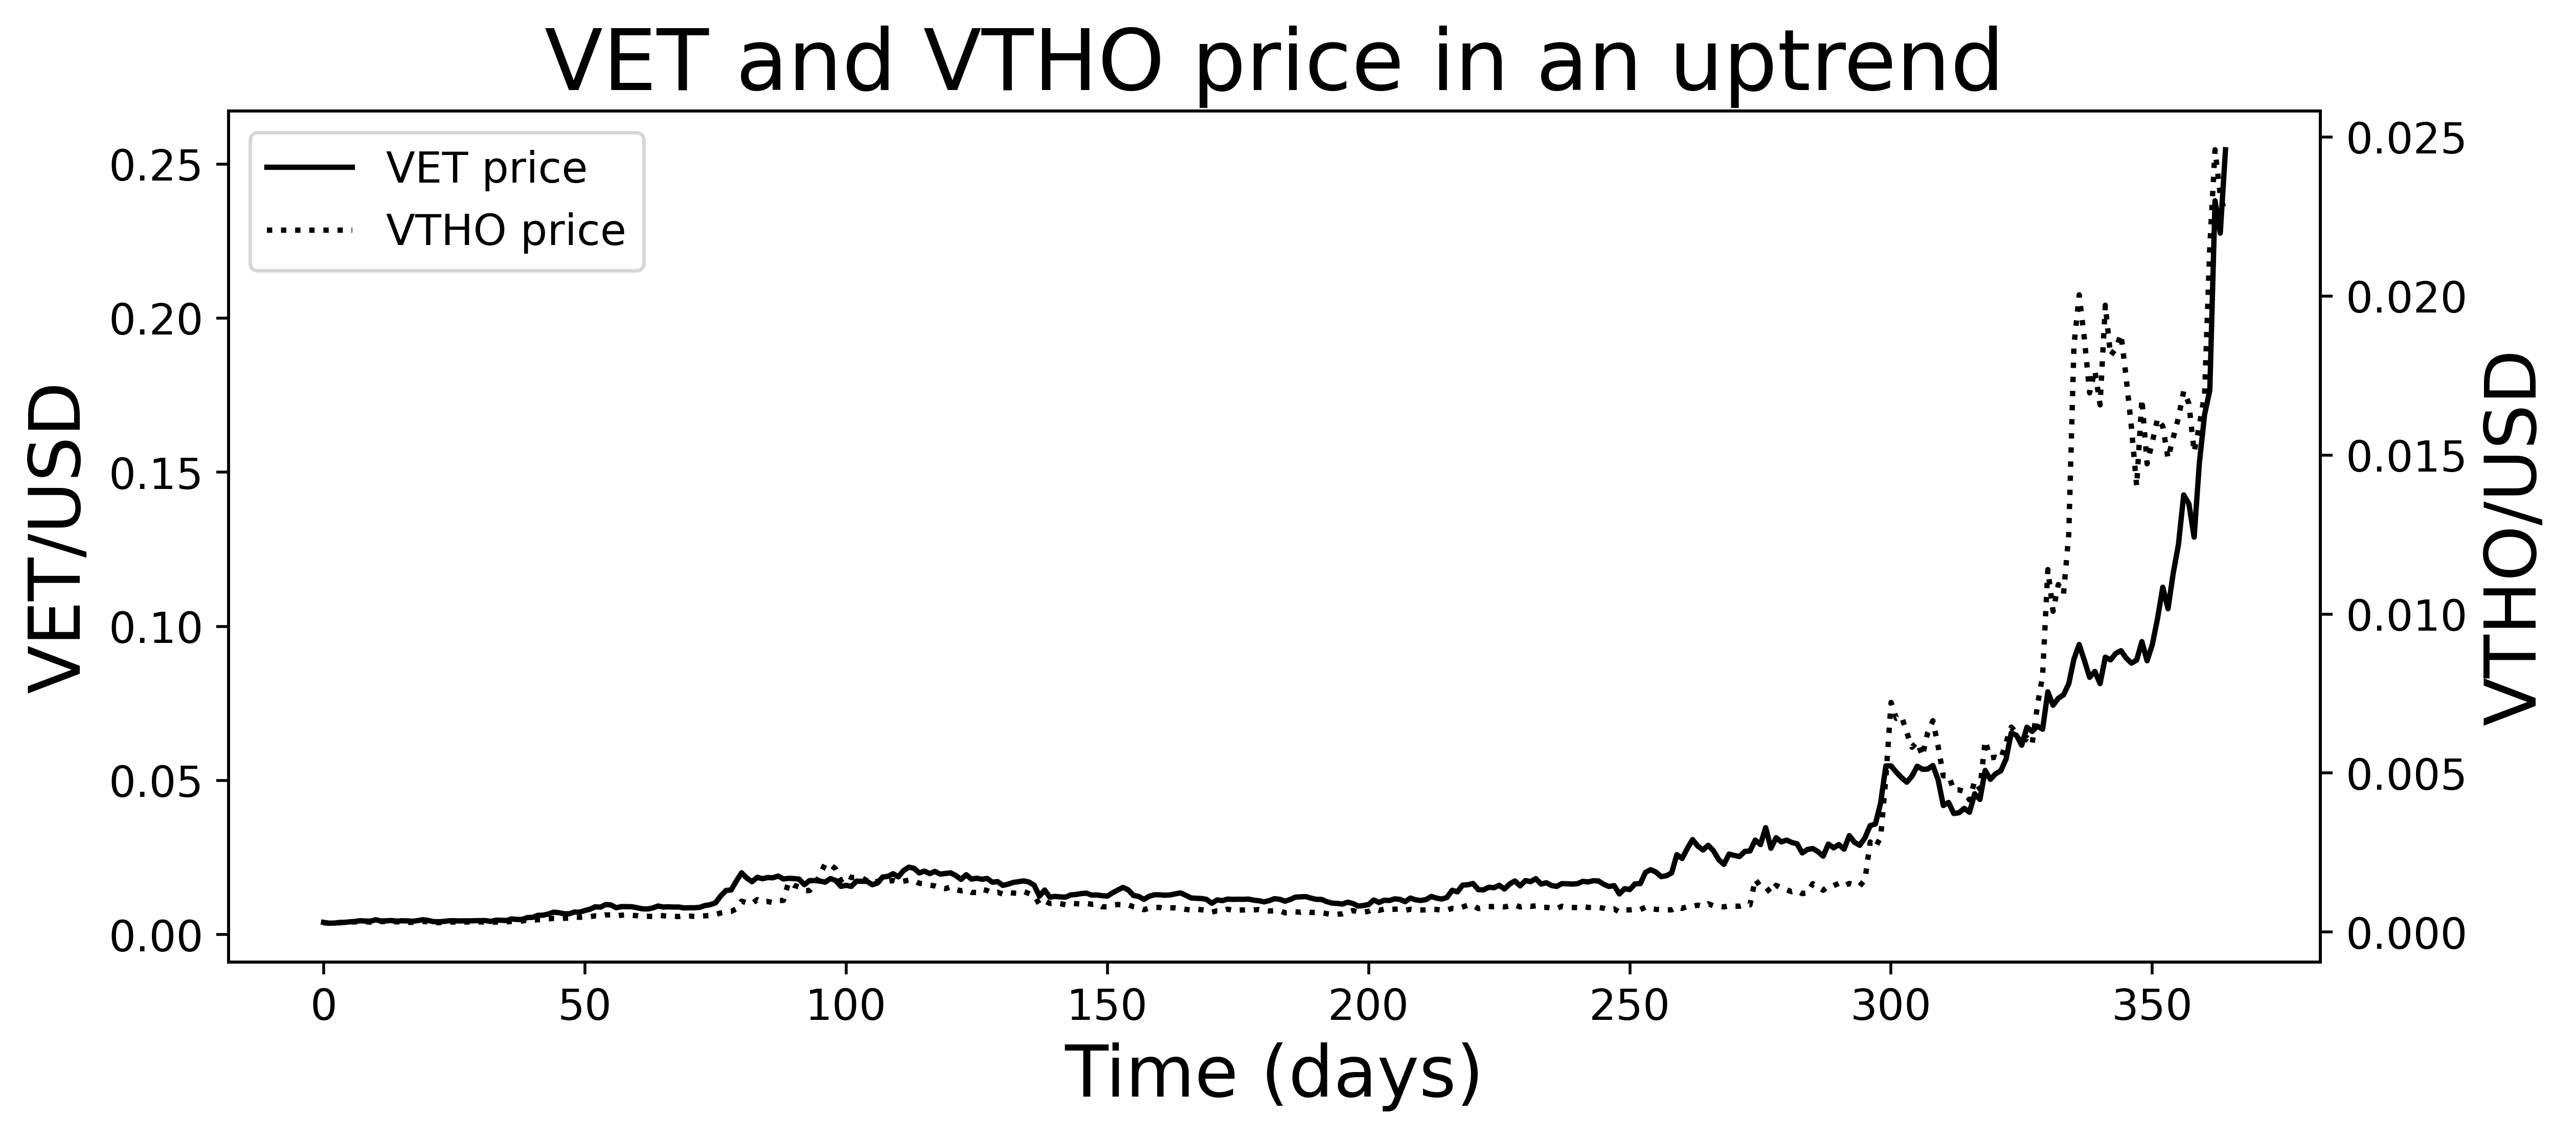

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=500)
plt.tight_layout(pad=5.0)
plt.title("VET and VTHO price in an uptrend", fontsize=24)

ax.tick_params(axis='x', labelsize=12)

ax.set_xlabel('Time (days)', color='black', fontsize=20)
ax.set_ylabel('VET/USD', color='black', fontsize=20)
ax.tick_params(axis='y', labelcolor='black', labelsize=12)

ax2 = ax.twinx()
ax2.set_ylabel('VTHO/USD', color='black', fontsize=20)
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

plot1 = ax.plot(list(df[625:990]["VET"]), color="black", label="VET price")
plot2 = ax2.plot(list(df[625:990]["VTHO"]),
                 color="black", linestyle=":", label="VTHO price")

# Add legend
lns = plot1 + plot2
labels = [l.get_label() for l in lns]
# plt.legend(lns, labels, loc=0)
plt.legend(lns, labels, fontsize=12, ncol=1)

plt.savefig("Writing/Images/Price data/VET-VTHO-uptrend.pdf",
            format="pdf", bbox_inches="tight")


### Plot downtrend

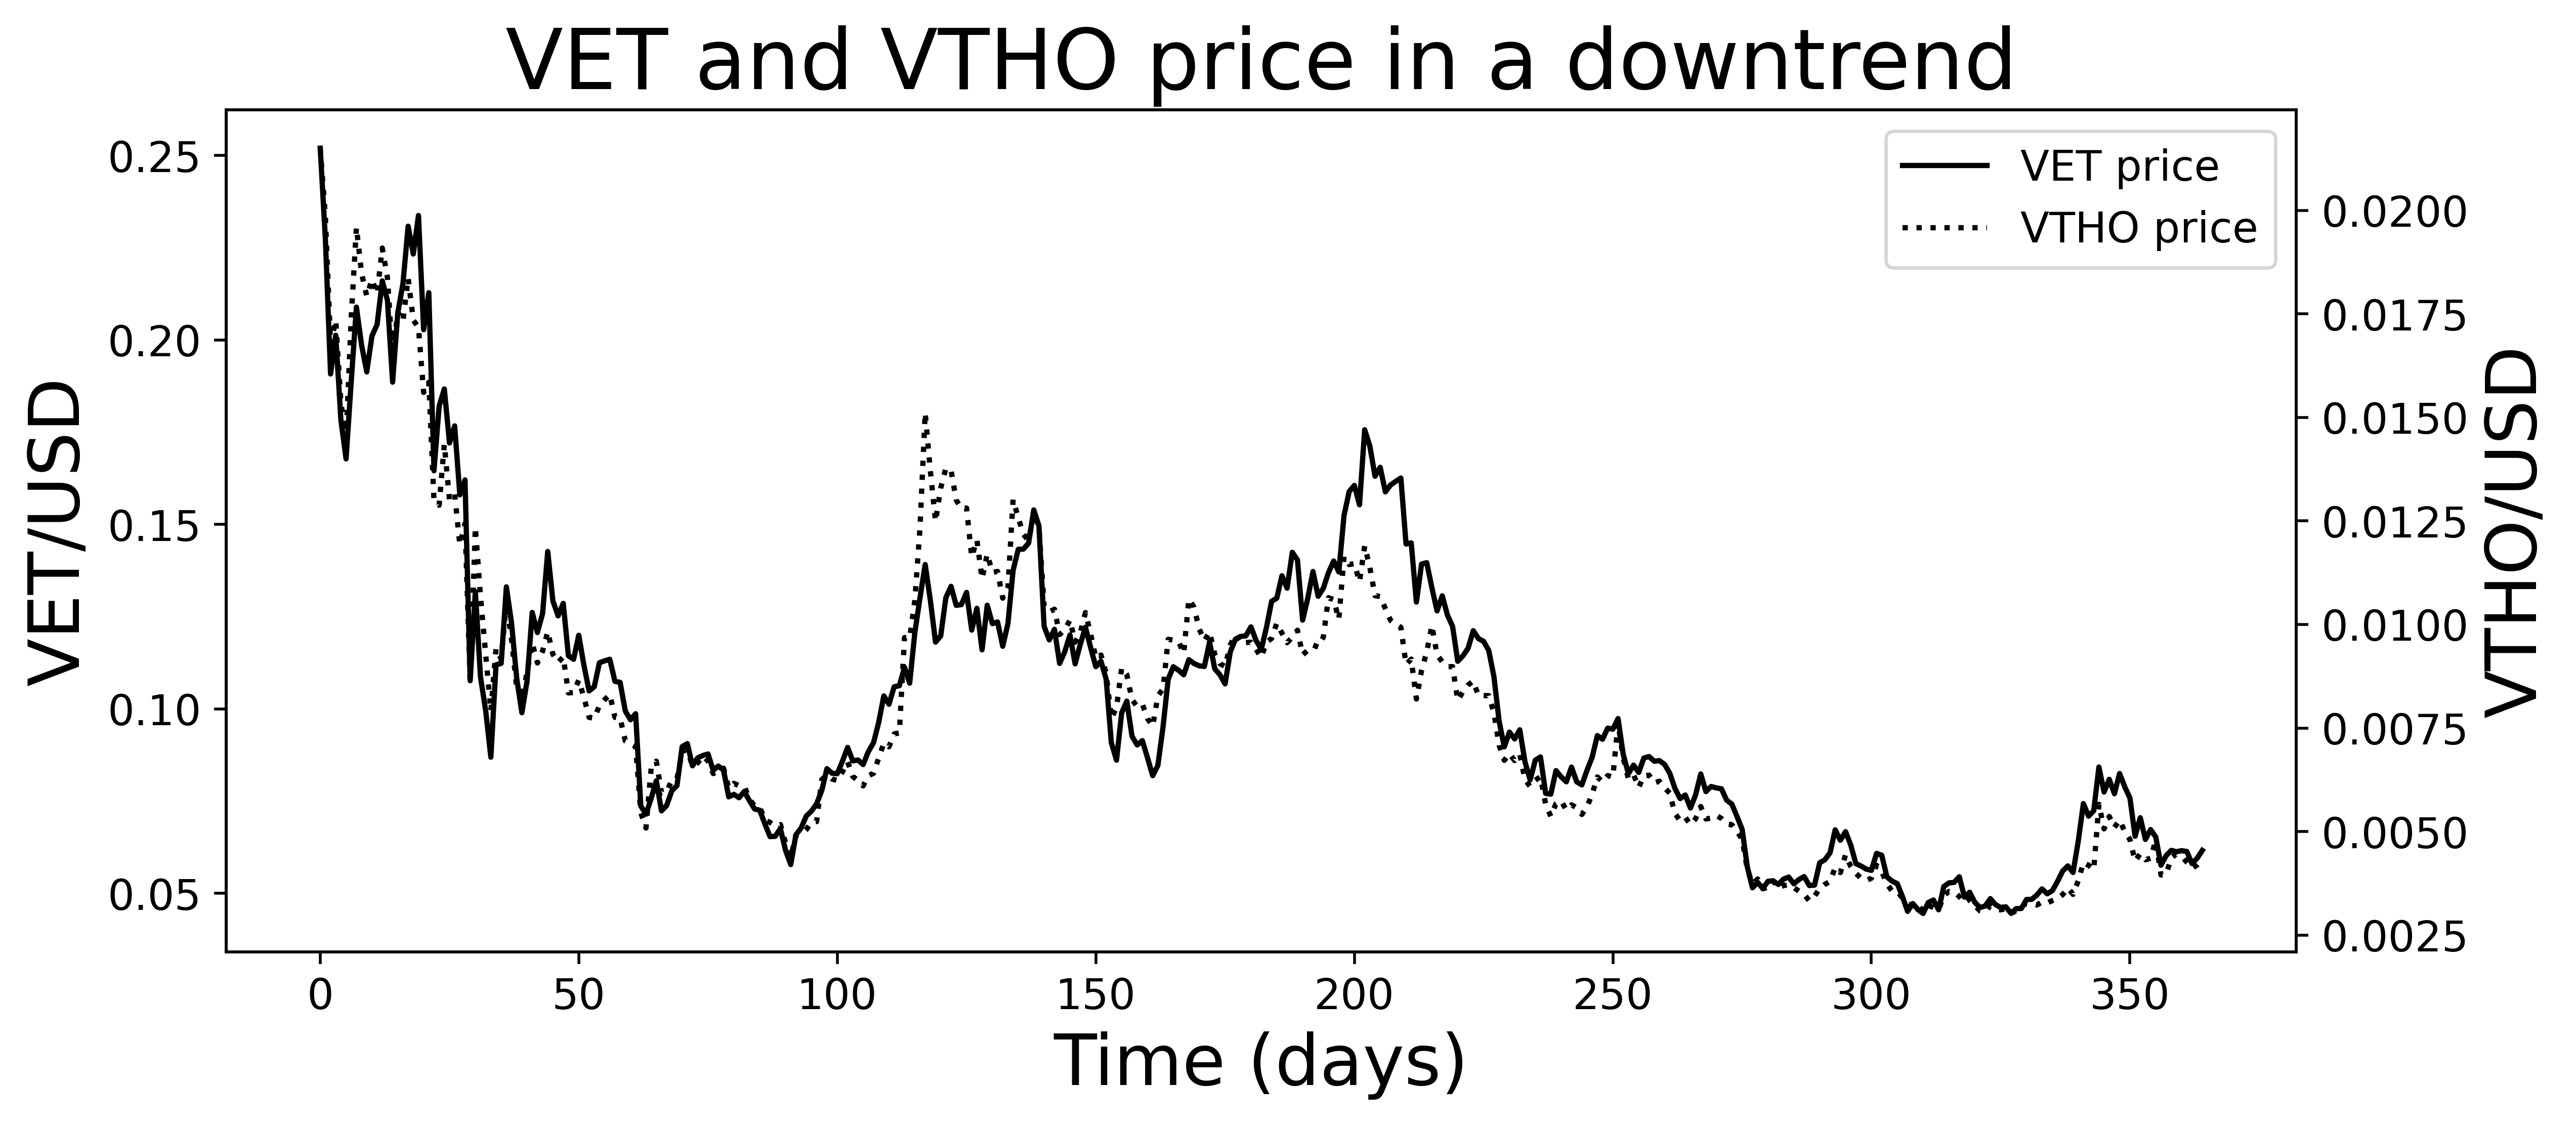

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=500)
plt.tight_layout(pad=5.0)
plt.title("VET and VTHO price in a downtrend", fontsize=24)

ax.tick_params(axis='x', labelsize=12)

ax.set_xlabel('Time (days)', color='black', fontsize=20)
ax.set_ylabel('VET/USD', color='black', fontsize=20)
ax.tick_params(axis='y', labelcolor='black', labelsize=12)


ax2 = ax.twinx()
ax2.set_ylabel('VTHO/USD', color='black', fontsize=20)
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

plot1 = ax.plot(list(df[991:-1]["VET"]), color="black", label="VET price")
plot2 = ax2.plot(list(df[991:-1]["VTHO"]), color="black",
                 linestyle=":", label="VTHO price")

# Add legend
lns = plot1 + plot2
labels = [l.get_label() for l in lns]
plt.legend(lns, labels, fontsize=12, ncol=1)

plt.savefig("Writing/Images/Price data/VET-VTHO-downtrend.pdf",
            format="pdf", bbox_inches="tight")


### Convert downtrend to match uptrend range

In [5]:
# VET_up_original = df["VET"][625:990]
# VET_down_original = df["VET"][991:]

# # Calculate range sizes
# down_span = max(VET_down_original) - min(VET_down_original)
# up_span = max(VET_up_original) - min(VET_up_original)

# # Convert downward series to between 0 and 1
# scaled_values = np.array(
#     [float(value - min(VET_down_original)) / float(down_span) for value in VET_down_original])

# # Convert downward series to new values
# VET_down_new = min(VET_up_original) + (scaled_values * up_span)

# # Recalculate percentage change
# df_VET_down_new = pd.DataFrame(VET_down_new)
# df_VET_down_new["VET_percentage"] = 1 + df_VET_down_new[0].pct_change()

In [6]:
# VET_down_original


In [7]:
# VET_down_new
# # 

In [8]:
# len(list(df_VET_down_new["VET_percentage"][1:]))
# # len(list(df[625:990]["VET_percentage"]))

### Save data

In [9]:
import pickle

# VET uptrend
filehandler = open("Model/Code/src/price_trends/VET-up.pkl", "wb")
pickle.dump(list(df[625:990]["VET_percentage"]), filehandler)
filehandler.close()

# VET downtrend
filehandler = open("Model/Code/src/price_trends/VET-down.pkl", "wb")
pickle.dump(list(df[991:-1]["VET_percentage"]), filehandler)
filehandler.close()

# # VTHO uptrend
# filehandler = open("Model/Code/src/price_trends/VTHO-up.pkl", "wb")
# pickle.dump(list(df[625:990]["VTHO_percentage"]), filehandler)
# filehandler.close()

# # VTHO downtrend
# filehandler = open("Model/Code/src/price_trends/VTHO-down.pkl", "wb")
# pickle.dump(list(df[991:-1]["VTHO_percentage"]), filehandler)
# filehandler.close()


In [10]:
# plt.plot(list(_down_original))
# plt.plot(list(_down_new))
